<a href="https://colab.research.google.com/github/keethu12345/Predictive_modelling_In_Lung_Cancer/blob/main/Lung_Cancer_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installations

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=a311b3e7cab0b3d37774bcd03def76bd89f3692d467d7d166dde8b1e9a7cd175
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install imbalanced-learn

### Loading the datasets

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# After uploading, you can check the uploaded files
import pandas as pd

# Load the dataset into a DataFrame
lung_cancer_data = pd.read_csv('lung_cancer_data.csv')  # Adjust the filename if needed

# Display the first few rows and summary of the dataset
lung_cancer_data_info = lung_cancer_data.info()
lung_cancer_data_head = lung_cancer_data.head()

lung_cancer_data_info, lung_cancer_data_head

Saving lung_cancer_data.csv to lung_cancer_data (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_Hist

(None,
     Patient_ID  Age  Gender Smoking_History  Tumor_Size_mm Tumor_Location  \
 0  Patient0000   68    Male  Current Smoker      81.678677     Lower Lobe   
 1  Patient0001   58    Male    Never Smoked      78.448272     Lower Lobe   
 2  Patient0002   44    Male   Former Smoker      67.714305     Lower Lobe   
 3  Patient0003   72    Male  Current Smoker      70.806008     Lower Lobe   
 4  Patient0004   37  Female    Never Smoked      87.272433     Lower Lobe   
 
        Stage          Treatment  Survival_Months         Ethnicity  ...  \
 0  Stage III            Surgery               44          Hispanic  ...   
 1    Stage I  Radiation Therapy              101         Caucasian  ...   
 2    Stage I       Chemotherapy               69  African American  ...   
 3  Stage III       Chemotherapy               95  African American  ...   
 4   Stage IV  Radiation Therapy              105             Asian  ...   
 
   Alanine_Aminotransferase_Level Aspartate_Aminotransferase_Leve

### Data Preprocessing

In [ ]:
# Step 2: Data Preprocessing

# Check for missing values
missing_values = lung_cancer_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Remove duplicates
lung_cancer_data = lung_cancer_data.drop_duplicates(subset=['Patient_ID'])

# Create a binary column for survival status
# Assuming that Survival_Months > 0 means the patient died (event)
lung_cancer_data['Survival_Status'] = (lung_cancer_data['Survival_Months'] > 0).astype(int)

# Encode categorical variables
categorical_columns = ['Gender', 'Smoking_History', 'Tumor_Location', 'Stage', 'Treatment', 'Ethnicity', 'Insurance_Type']
lung_cancer_data = pd.get_dummies(lung_cancer_data, columns=categorical_columns, drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Age', 'Tumor_Size_mm', 'Performance_Status', 'Blood_Pressure_Systolic',
                     'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
                     'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
                     'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
                     'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
                     'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level',
                     'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years']

scaler = StandardScaler()
lung_cancer_data[numerical_columns] = scaler.fit_transform(lung_cancer_data[numerical_columns])

# Display the final dataset structure
print("\nFinal dataset information after preprocessing:")
lung_cancer_data_info = lung_cancer_data.info()

Missing values in each column:
Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count     

### Exploratory Data analysis

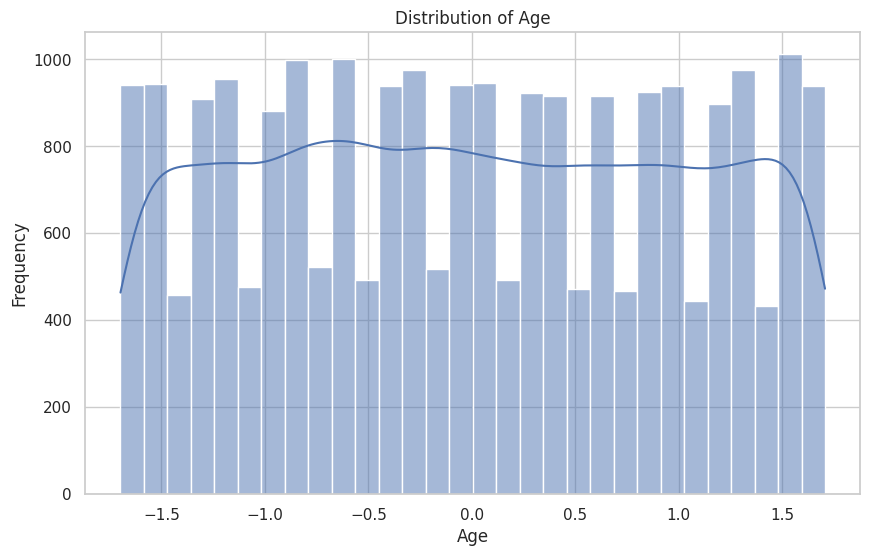

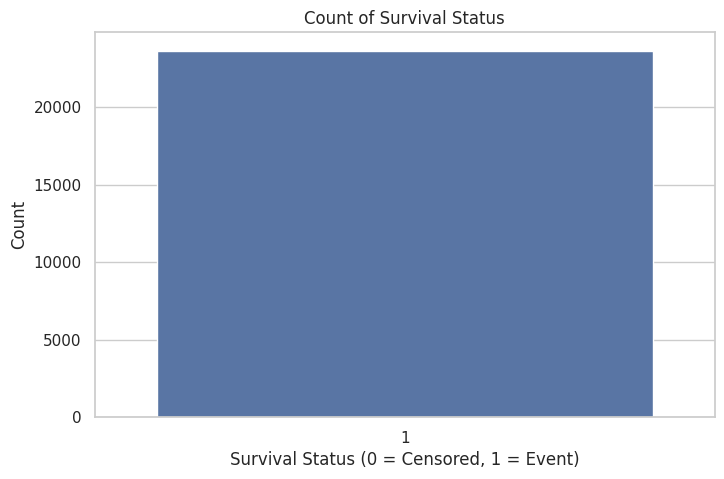

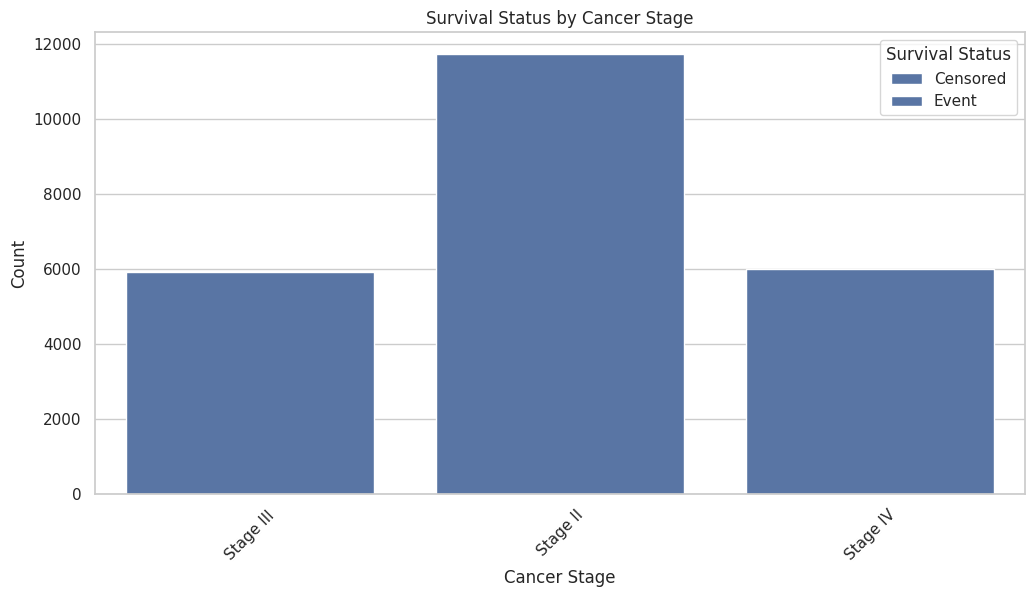

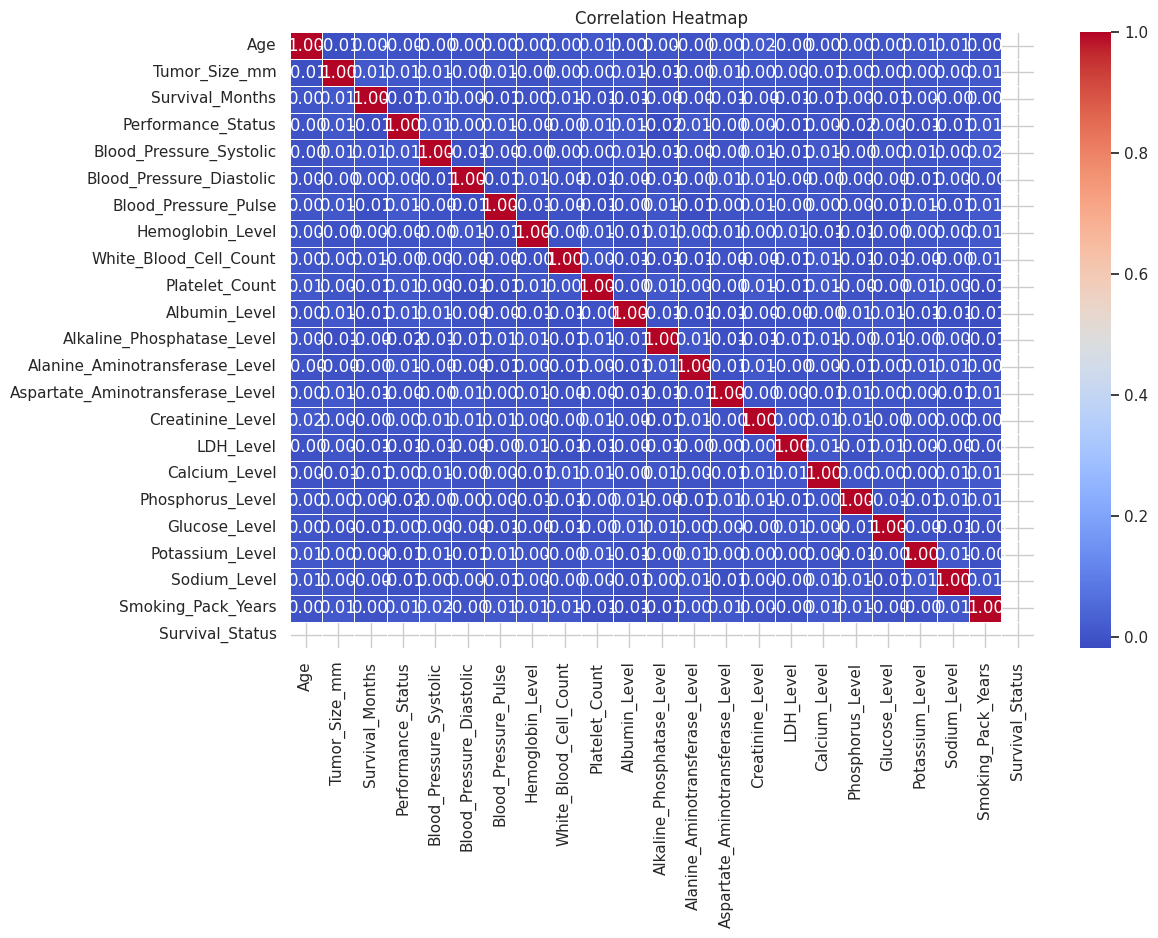

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(lung_cancer_data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Survival Status Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survival_Status', data=lung_cancer_data)
plt.title('Count of Survival Status')
plt.xlabel('Survival Status (0 = Censored, 1 = Event)')
plt.ylabel('Count')
plt.show()

# 3. Survival by Stage
# Create a new DataFrame to plot survival by stage using the one-hot encoded columns
stage_columns = ['Stage_Stage II', 'Stage_Stage III', 'Stage_Stage IV']
lung_cancer_data['Stage'] = lung_cancer_data[stage_columns].idxmax(axis=1).str.replace('Stage_', '')

plt.figure(figsize=(12, 6))
sns.countplot(x='Stage', hue='Survival_Status', data=lung_cancer_data)
plt.title('Survival Status by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.legend(title='Survival Status', loc='upper right', labels=['Censored', 'Event'])
plt.xticks(rotation=45)
plt.show()

# 4. Correlation Heatmap
# Ensure only numerical columns are included for the heatmap
numerical_cols = lung_cancer_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
correlation_matrix = lung_cancer_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = lung_cancer_data.drop(columns=['Patient_ID', 'Survival_Months', 'Survival_Status'])
y = lung_cancer_data['Survival_Status']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the train and test sets
print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (16560, 48), Test set shape: (7098, 48)


### Cox Proportional Hazards Model

In [ ]:
from lifelines import CoxPHFitter
# Check the data types of the columns
print(lung_cancer_data.dtypes)

# Convert relevant columns to numeric where necessary
# Ensure that 'Survival_Months' and 'Survival_Status' are numeric
lung_cancer_data['Survival_Months'] = pd.to_numeric(lung_cancer_data['Survival_Months'], errors='coerce')
lung_cancer_data['Survival_Status'] = pd.to_numeric(lung_cancer_data['Survival_Status'], errors='coerce')

# Remove non-numeric columns from the features
X_train = X_train.select_dtypes(include=[float, int])

# Create a new DataFrame for fitting the Cox model
cox_data_train = X_train.copy()
cox_data_train['Survival_Months'] = lung_cancer_data.loc[X_train.index, 'Survival_Months']
cox_data_train['Survival_Status'] = y_train.values

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(cox_data_train, duration_col='Survival_Months', event_col='Survival_Status')

# Display the summary of the model
cph.print_summary()


Patient_ID                           object
Age                                 float64
Tumor_Size_mm                       float64
Survival_Months                       int64
Family_History                       object
Comorbidity_Diabetes                 object
Comorbidity_Hypertension             object
Comorbidity_Heart_Disease            object
Comorbidity_Chronic_Lung_Disease     object
Comorbidity_Kidney_Disease           object
Comorbidity_Autoimmune_Disease       object
Comorbidity_Other                    object
Performance_Status                  float64
Blood_Pressure_Systolic             float64
Blood_Pressure_Diastolic            float64
Blood_Pressure_Pulse                float64
Hemoglobin_Level                    float64
White_Blood_Cell_Count              float64
Platelet_Count                      float64
Albumin_Level                       float64
Alkaline_Phosphatase_Level          float64
Alanine_Aminotransferase_Level      float64
Aspartate_Aminotransferase_Level

<lifelines.CoxPHFitter: fitted with 16560 total observations, 0 right-censored observations>
             duration col = 'Survival_Months'
                event col = 'Survival_Status'
      baseline estimation = breslow
   number of observations = 16560
number of events observed = 16560
   partial log-likelihood = -144306.75
         time fit was run = 2024-10-15 08:55:53 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
Age                              -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
Tumor_Size_mm                    -0.02      0.98      0.01           -0.03           -0.00                0.97                1.00
Performance_Status                0.01      1.01      0.01           -0.00            0.03                1.00                1.03
Blood_Pressure_Systolic          -0.02      0.98      0.01           -0.03           -0.00                0.97                1.00
Blood_Pressure_Diastolic         -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
Blood_Pressure_Pulse              0.01      1.01      0.01           -0.01            0.02                0.99                1.02
Hemoglobin_Level                  0.00      1.00      0.01           -0.01            0.02                0.99                1.02
White_Blood_Cell_Count           -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
Platelet_Count                    0.01      1.01      0.01           -0.01            0.02                0.99                1.02
Albumin_Level                     0.01      1.01      0.01           -0.01            0.02                0.99                1.02
Alkaline_Phosphatase_Level       -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
Alanine_Aminotransferase_Level   -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
Aspartate_Aminotransferase_Level  0.00      1.00      0.01           -0.01            0.02                0.99                1.02
Creatinine_Level                 -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
LDH_Level                         0.01      1.01      0.01           -0.00            0.03                1.00                1.03
Calcium_Level                     0.02      1.02      0.01            0.00            0.03                1.00                1.03
Phosphorus_Level                 -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
Glucose_Level                     0.00      1.00      0.01           -0.01            0.02                0.99                1.02
Potassium_Level                  -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
Sodium_Level                     -0.00      1.00      0.01           -0.02            0.02                0.98                1.02
Smoking_Pack_Years                0.01      1.01      0.01           -0.01            0.02                0.99                1.02

                                  cmp to     z    p  -log2(p)
covariate                                                    
Age                                 0.00 -1.17 0.24      2.04
Tumor_Size_mm                       0.00 -2.19 0.03      5.13
Performance_Status                  0.00  1.89 0.06      4.10
Blood_Pressure_Systolic             0.00 -2.08 0.04      4.74
Blood_Pressure_Diastolic            0.00 -0.19 0.85      0.24
Blood_Pressure_Pulse                0.00  1.05 0.29      1.78
Hemoglobin_Level                    0.00  0.12 0.90      0.14
White_Blood_Cell_Count              0.00 -1

### Evaluating the cox model

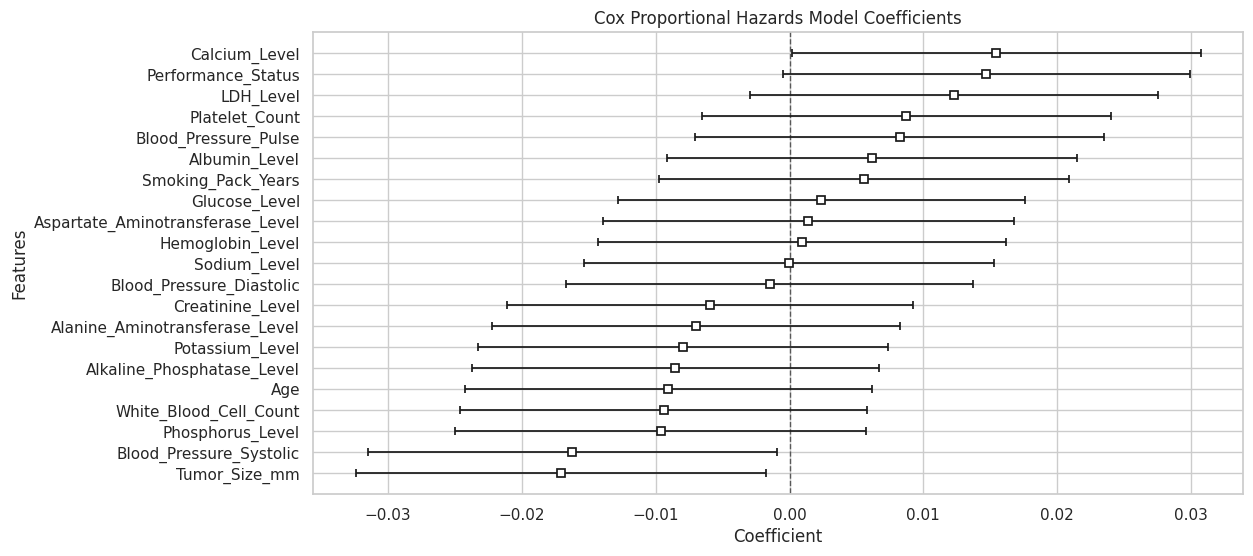

C-index: 0.4887


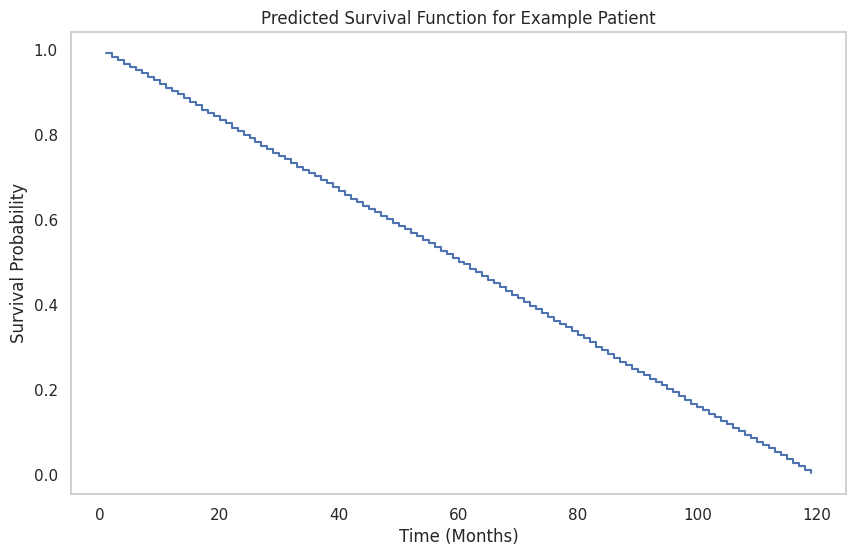

In [ ]:
from lifelines.utils import concordance_index

# 1. Plot the coefficients of the model
plt.figure(figsize=(12, 6))
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

# 2. Evaluate the model using the C-index
# Calculate the predicted hazard ratios
predicted_hazard = cph.predict_partial_hazard(cox_data_train)
# Calculate the C-index
c_index = concordance_index(cox_data_train['Survival_Months'], predicted_hazard, cox_data_train['Survival_Status'])
print(f'C-index: {c_index:.4f}')

# 3. Plot the survival function for an example patient
# Selecting an example patient from the training set
example_patient = cox_data_train.iloc[0]  # Change the index to visualize different patients
survival_function = cph.predict_survival_function(example_patient)

plt.figure(figsize=(10, 6))
plt.step(survival_function.index, survival_function.values, where="post")
plt.title('Predicted Survival Function for Example Patient')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

In [ ]:
survival_probabilities = cph.predict_survival_function(X_test_combined)
print(survival_probabilities)

          892       5878      21962     391       3564      16538     20524  \
1.0    0.991108  0.991866  0.991656  0.991332  0.991723  0.991226  0.991524   
2.0    0.982714  0.984183  0.983776  0.983148  0.983904  0.982942  0.983520   
3.0    0.974260  0.976439  0.975835  0.974904  0.976026  0.974598  0.975456   
4.0    0.965809  0.968692  0.967892  0.966661  0.968145  0.966256  0.967391   
5.0    0.958041  0.961565  0.960588  0.959082  0.960897  0.958588  0.959975   
...         ...       ...       ...       ...       ...       ...       ...   
115.0  0.033230  0.044482  0.041030  0.036224  0.042091  0.034771  0.039003   
116.0  0.025845  0.035350  0.032413  0.028353  0.033313  0.027134  0.030696   
117.0  0.017910  0.025278  0.022977  0.019832  0.023681  0.018895  0.021642   
118.0  0.010897  0.016049  0.014417  0.012219  0.014913  0.011573  0.013479   
119.0  0.003828  0.006166  0.005404  0.004408  0.005634  0.004122  0.004974   

          1589      7805      14010  ...     3266  

### Support Vector Machine(SVM) Model

In [ ]:
# Convert all column names to strings
X_combined.columns = X_combined.columns.astype(str)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load your dataset again if needed (assuming lung_cancer_data is already in the environment)

# Create a binary column for survival status (1 = event, 0 = censored)
lung_cancer_data['Survival_Status'] = (lung_cancer_data['Survival_Months'] > 0).astype(int)

# Prepare the data
X = lung_cancer_data.drop(columns=['Patient_ID', 'Survival_Months', 'Survival_Status'])
y = lung_cancer_data['Survival_Status']

# Check the distribution of the target variable
print(y.value_counts())

# Generate synthetic data for class 0
num_synthetic_samples = 50
synthetic_data = {
    'Age': np.random.uniform(low=X['Age'].min(), high=X['Age'].max(), size=num_synthetic_samples),
    'Tumor_Size_mm': np.random.uniform(low=X['Tumor_Size_mm'].min(), high=X['Tumor_Size_mm'].max(), size=num_synthetic_samples),
    'Performance_Status': np.random.uniform(low=X['Performance_Status'].min(), high=X['Performance_Status'].max(), size=num_synthetic_samples),
    'Blood_Pressure_Systolic': np.random.uniform(low=X['Blood_Pressure_Systolic'].min(), high=X['Blood_Pressure_Systolic'].max(), size=num_synthetic_samples),
    'Blood_Pressure_Diastolic': np.random.uniform(low=X['Blood_Pressure_Diastolic'].min(), high=X['Blood_Pressure_Diastolic'].max(), size=num_synthetic_samples),
    'Blood_Pressure_Pulse': np.random.uniform(low=X['Blood_Pressure_Pulse'].min(), high=X['Blood_Pressure_Pulse'].max(), size=num_synthetic_samples),
    'Hemoglobin_Level': np.random.uniform(low=X['Hemoglobin_Level'].min(), high=X['Hemoglobin_Level'].max(), size=num_synthetic_samples),
    'White_Blood_Cell_Count': np.random.uniform(low=X['White_Blood_Cell_Count'].min(), high=X['White_Blood_Cell_Count'].max(), size=num_synthetic_samples),
    'Platelet_Count': np.random.uniform(low=X['Platelet_Count'].min(), high=X['Platelet_Count'].max(), size=num_synthetic_samples),
    'Albumin_Level': np.random.uniform(low=X['Albumin_Level'].min(), high=X['Albumin_Level'].max(), size=num_synthetic_samples),
    'Alkaline_Phosphatase_Level': np.random.uniform(low=X['Alkaline_Phosphatase_Level'].min(), high=X['Alkaline_Phosphatase_Level'].max(), size=num_synthetic_samples),
    'Alanine_Aminotransferase_Level': np.random.uniform(low=X['Alanine_Aminotransferase_Level'].min(), high=X['Alanine_Aminotransferase_Level'].max(), size=num_synthetic_samples),
    'Aspartate_Aminotransferase_Level': np.random.uniform(low=X['Aspartate_Aminotransferase_Level'].min(), high=X['Aspartate_Aminotransferase_Level'].max(), size=num_synthetic_samples),
    'Creatinine_Level': np.random.uniform(low=X['Creatinine_Level'].min(), high=X['Creatinine_Level'].max(), size=num_synthetic_samples),
    'LDH_Level': np.random.uniform(low=X['LDH_Level'].min(), high=X['LDH_Level'].max(), size=num_synthetic_samples),
    'Calcium_Level': np.random.uniform(low=X['Calcium_Level'].min(), high=X['Calcium_Level'].max(), size=num_synthetic_samples),
    'Phosphorus_Level': np.random.uniform(low=X['Phosphorus_Level'].min(), high=X['Phosphorus_Level'].max(), size=num_synthetic_samples),
    'Glucose_Level': np.random.uniform(low=X['Glucose_Level'].min(), high=X['Glucose_Level'].max(), size=num_synthetic_samples),
    'Potassium_Level': np.random.uniform(low=X['Potassium_Level'].min(), high=X['Potassium_Level'].max(), size=num_synthetic_samples),
    'Sodium_Level': np.random.uniform(low=X['Sodium_Level'].min(), high=X['Sodium_Level'].max(), size=num_synthetic_samples),
    'Smoking_Pack_Years': np.random.uniform(low=X['Smoking_Pack_Years'].min(), high=X['Smoking_Pack_Years'].max(), size=num_synthetic_samples),
}

# Create synthetic DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Create target variable for synthetic data (0)
synthetic_df['Survival_Status'] = 0

# Combine the original data with the synthetic data
combined_df = pd.concat([lung_cancer_data, synthetic_df], ignore_index=True)

# Prepare features and target variable
X_combined = combined_df.drop(columns=['Patient_ID', 'Survival_Months', 'Survival_Status'])
y_combined = combined_df['Survival_Status']

# Convert categorical variables to numeric using OneHotEncoder
# Identify categorical columns that may need encoding
categorical_columns = X_combined.select_dtypes(include=['object']).columns.tolist()

# Use OneHotEncoder for categorical features
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = pd.DataFrame(ohe.fit_transform(X_combined[categorical_columns]))

# Combine with numerical features
X_combined = pd.concat([X_combined.drop(categorical_columns, axis=1).reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Convert all column names to strings
X_combined.columns = X_combined.columns.astype(str)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42, stratify=y_combined)

# Create and train the SVM model
svm_model = make_pipeline(StandardScaler(), SVC(probability=True))
svm_model.fit(X_train_combined, y_train_combined)

# Make predictions
y_pred_svm = svm_model.predict(X_test_combined)

# Evaluate the SVM model
print("Confusion Matrix:")
print(confusion_matrix(y_test_combined, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test_combined, y_pred_svm))

# Calculate ROC AUC score
roc_auc_svm = roc_auc_score(y_test_combined, svm_model.predict_proba(X_test_combined)[:, 1])
print(f'ROC AUC Score: {roc_auc_svm:.4f}')


Survival_Status
1    23658
Name: count, dtype: int64
Confusion Matrix:
[[  15    0]
 [   0 7098]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00      7098

    accuracy                           1.00      7113
   macro avg       1.00      1.00      1.00      7113
weighted avg       1.00      1.00      1.00      7113

ROC AUC Score: 1.0000


### Evaluating the SVM model and improving the performance

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the model
svm_model_cv = make_pipeline(StandardScaler(), SVC(probability=True))

# Perform k-fold cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(svm_model_cv, X_combined, y_combined, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_combined, y_train_combined)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validation score: 1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Refit the SVM model using the best parameters
best_svm_model = make_pipeline(StandardScaler(), SVC(C=0.1, kernel='linear', gamma='scale', probability=True))
best_svm_model.fit(X_train_combined, y_train_combined)

# Make predictions and evaluate
y_pred_best_svm = best_svm_model.predict(X_test_combined)
print("Confusion Matrix:")
print(confusion_matrix(y_test_combined, y_pred_best_svm))
print("\nClassification Report:")
print(classification_report(y_test_combined, y_pred_best_svm))
roc_auc_best_svm = roc_auc_score(y_test_combined, best_svm_model.predict_proba(X_test_combined)[:, 1])
print(f'ROC AUC Score: {roc_auc_best_svm:.4f}')


Confusion Matrix:
[[  15    0]
 [   0 7098]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00      7098

    accuracy                           1.00      7113
   macro avg       1.00      1.00      1.00      7113
weighted avg       1.00      1.00      1.00      7113

ROC AUC Score: 1.0000


### Visualization of the model's performances

A) SVM Model Visualization

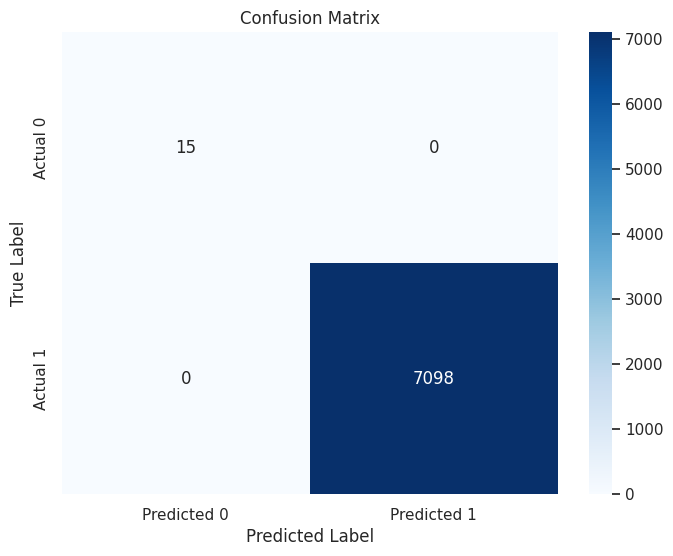

In [ ]:
# Confusion Matrix Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test_combined, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


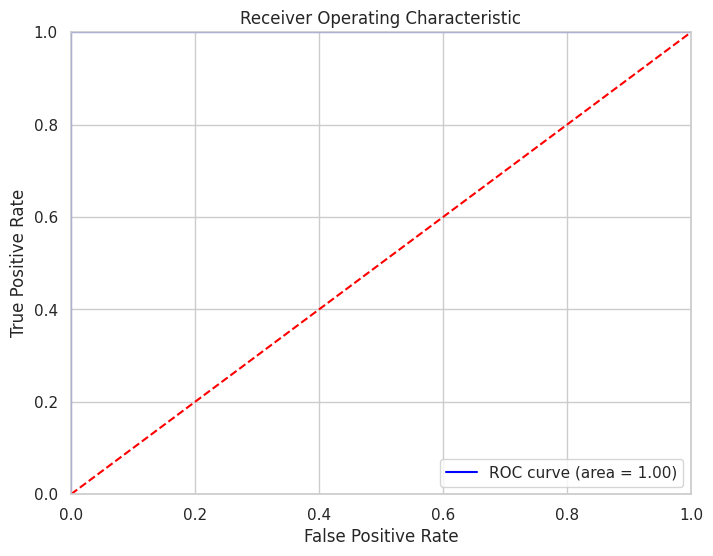

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_combined, svm_model.predict_proba(X_test_combined)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test_combined, y_pred_svm)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


B) COX Model Visualization

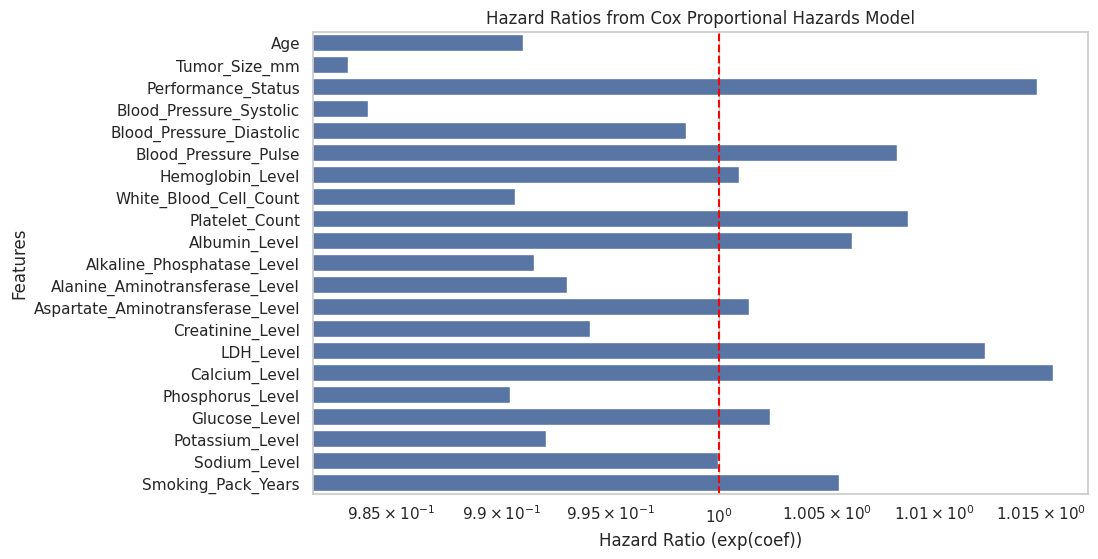

In [ ]:
#Hazard Ratios
# Get the summary dataframe from Cox model
summary = cph.summary

# Plot hazard ratios
plt.figure(figsize=(10, 6))
sns.barplot(x=summary['exp(coef)'], y=summary.index)
plt.axvline(1, linestyle='--', color='red')  # Line at 1
plt.title('Hazard Ratios from Cox Proportional Hazards Model')
plt.xlabel('Hazard Ratio (exp(coef))')
plt.ylabel('Features')
plt.xscale('log')  # Log scale for better visualization
plt.show()


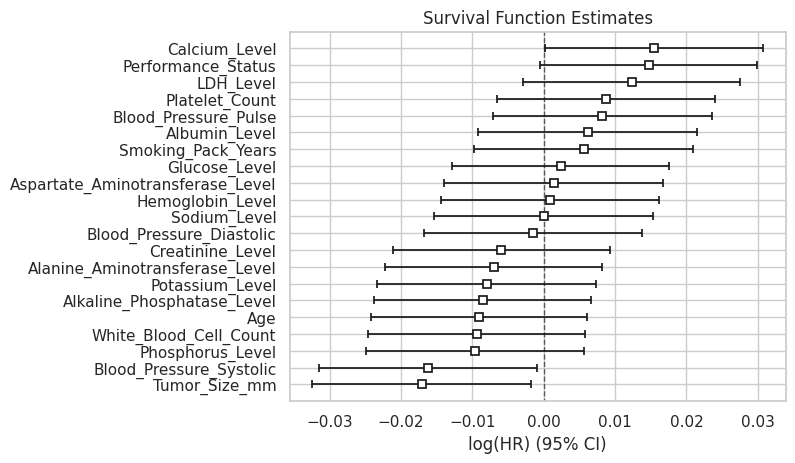

In [ ]:
#Survival Curves
# Plot survival function for different groups
cph.plot()
plt.title('Survival Function Estimates')
plt.show()